In [24]:
# Change here using YOUR own first and last names
fn1 = "juan"
ln1 = "rios"
filename = "_".join(map(lambda s: s.strip().lower(), [
                    "SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

### Imports


In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from IPython.display import display

## 1

For the first question, we load a standard dataset from sklearn.datasets named _fetch_california_housing_. This dataset has only p = 8 variables


### (a)

Estimate the coefficients with the expression of the normal equaitons seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.


In [26]:
df_housing = datasets.fetch_california_housing()

# Create a dataframe with the data
X = df_housing.data
y = df_housing.target

# Add a column of ones to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [27]:
theta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_hat = X_test @ theta_hat

In [28]:
# Function to calculate determination coefficient
def r2(y, y_pred):
    y_mean = np.mean(y)
    SS_tot = np.sum((y - y_mean)**2)
    SS_res = np.sum((y - y_pred)**2)
    r2 = 1 - SS_res/SS_tot
    return r2

# Function to calculate mean squared error


def mse(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

In [29]:
# Estimate R²
score_test = metrics.r2_score(y_test, y_hat)
print("R²: ", score_test)

# Estimate the mean squared error
mse_test = metrics.mean_squared_error(y_test, y_hat)
print("Mean squared error (test): ", mse_test)

R²:  0.5911695436412532
Mean squared error (test):  0.5404128061706377


In [30]:
score = r2(y_test, y_hat)
print("R²: ", score)
mse_pred = mse(y_test, y_hat)
print("Mean squared error: ", mse_pred)

R²:  0.5911695436412532
Mean squared error:  0.5404128061706377


#### Answer

After training the model, we can see that the R² and MSE metrics are the same with the programmed function and the sklearn functions, which leads us to deduce that the functions are correctly programmed.


### (b)

Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI seen in session 3.


##### Answer


In [31]:
n = len(X_train)

# Degrees of freedom
df = n - len(theta_hat)

# Error of coefficients
# Standard deviation of the error
sigma = np.sqrt(np.sum((y_train - X_train @ theta_hat)**2) /
                (n-1 - np.linalg.matrix_rank(X_train)))

# Standard error of the coefficients
se = np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train)))*sigma

# t_value for 99% confidence interval
alpha = 0.01
t_value = t.ppf(1-alpha/2, df)

# Confidence interval
lower = theta_hat - t_value * se
upper = theta_hat + t_value * se

# Intervals for each coefficient
for i in range(len(theta_hat)):
    print("theta_{}: {:.7f} : \t[{:.7f}, {:.7f}]".format(
        i, theta_hat[i], lower[i], upper[i]))

theta_0: -36.6095938 : 	[-38.5661033, -34.6530842]
theta_1: 0.4390910 : 	[0.4266111, 0.4515710]
theta_2: 0.0095986 : 	[0.0082772, 0.0109200]
theta_3: -0.1033112 : 	[-0.1207279, -0.0858945]
theta_4: 0.6167302 : 	[0.5343945, 0.6990658]
theta_5: -0.0000076 : 	[-0.0000216, 0.0000063]
theta_6: -0.0044884 : 	[-0.0067426, -0.0022342]
theta_7: -0.4173533 : 	[-0.4387300, -0.3959766]
theta_8: -0.4306145 : 	[-0.4529954, -0.4082335]


## 2

For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data:


### (a)

Separate the data in train and test sets: save one fourth of the data as testing _train_test_split from sklearn.model_selection_ with the random seed set to 0 and standardize both the training and testing sets using the _fit_transform_ and transform functions in _sklearn.preprocessing.StandardScaler_.


#### Answer


In [32]:
df = pd.read_csv("data.csv", header=None)

# Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(210, axis=1), df[210], test_size=0.25, random_state=0)

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = preprocessing.StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

### (b)

Fit a regular OLS.


#### Answer

The model returns a R² of 0.21 and a MSE of 0.63 for the test predictions


In [33]:
# Create a linear regression model
reg = LinearRegression(fit_intercept=False)

# Train the model
reg.fit(X_train, y_train)

y_pred_lr_train = reg.predict(X_train)
y_pred_lr_test = reg.predict(X_test)

# Estimate R² for the training set
score_train = r2(y_train, y_pred_lr_train)
print("R² (train): ", score_train)
# Estimate R² for the test set
score_test = r2(y_test, y_pred_lr_test)
print("R² (test): ", score_test)

# Estimate the mean squared error for the training set
mse_train = mse(y_train, y_pred_lr_train)
print("Mean squared error (train): ", mse_train)

# Estimate the mean squared error for the test set
mse_test = mse(y_test, y_pred_lr_test)
print("Mean squared error (test): ", mse_test)

R² (train):  0.5337133559939369
R² (test):  0.2115060533241676
Mean squared error (train):  0.4662866440060633
Mean squared error (test):  0.6259576603541418


## 3

Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one variable relevant for predicting y and includes it in the set S. It runs until a halting condition is
met. The coding process is as follows:

(a) Develop a function that, given a dataset X P R nˆp and y, fits p linear regression models, each using only feature Xj to predict y. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

(b) Apply the function iteratively. At each iteration, select the feature Xf with the smallest p-value and:
i. Include it in the set S.
ii. Remove it from X.
iii. Subtract from y the residuals of the model fit with feature Xf . Elaborate on the reason for subtracting the residuals.

(c) Add a halting condition to the algorithm: Stop adding features to the set S when the p-value exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same plot).


#### Answer

Algorithm for forward variable selection based on hypothesis tests for regression coefficients


In [34]:
def calc_test_stat_no_effect(X, y):
    n = len(y)
    X = X.values.reshape(-1, 1)
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # Estimate of the parameter

    # Calculate the residuals
    res = y - X @ theta_hat
    # Noise Level
    sigma_hat = np.sqrt(np.sum(res**2) / (n - 2))
    # Calculate the test statistic

    G = X.T @ X

    test_stat = np.abs(theta_hat[0]) / (sigma_hat*(np.sqrt(1/G)))
    test_stat = test_stat[0]

    return test_stat


def forward_var_selection(X, y, p_value_threshold=0.05):
    # Initialize the list of selected features and p-values
    X = pd.DataFrame(X)

    features = X.columns.tolist()

    features_selected = []
    p_values_selected = []
    iterations = []

    while len(features) > 0:
        best_p_value = 1
        best_feature = None
        best_model = None
        best_preds = None

        # add a iter to the list
        p_values = []

        for f in features:

            # Scale the feature
            feature = X[[f]]

            # fit model
            reg = LinearRegression(fit_intercept=False)
            model = reg.fit(feature, y)
            preds = model.predict(feature)

            # Calculate the statistics
            test_stat = calc_test_stat_no_effect(feature, y)

            # Calculate the p-value
            p_value = 2 * (1 - t.cdf(np.abs(test_stat), df=len(y) - 2))

            p_values.append(p_value)

            # Check if this is the best feature
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = f
                best_model = model
                best_preds = preds

        # add a iter to the list
        iterations.append(p_values)

        # Halting condition
        if best_p_value > p_value_threshold:
            break
            # return features_selected, p_values_selected

        # Remove the selected feature from the list of features
        features.remove(best_feature)
        features_selected.append(best_feature)
        p_values_selected.append(best_p_value)
        y = y - best_preds

    return features_selected, p_values_selected, iterations

In [35]:
# P values of selected features
features_selected, p_values_selected, iterations = forward_var_selection(
    X_train, y_train)

# Print the selected features and their p-values
for f, p in zip(features_selected, p_values_selected):
    print("Feature: {}, p-value: {}".format(f, p))

Feature: 34, p-value: [0.]
Feature: 58, p-value: [0.]
Feature: 79, p-value: [6.86353308e-09]
Feature: 123, p-value: [2.21298678e-06]
Feature: 135, p-value: [0.00261146]
Feature: 167, p-value: [0.00043827]
Feature: 30, p-value: [0.00419006]
Feature: 77, p-value: [0.01191259]
Feature: 168, p-value: [0.00697242]
Feature: 174, p-value: [0.01394183]
Feature: 129, p-value: [0.027497]
Feature: 183, p-value: [0.04437968]
Feature: 13, p-value: [0.04520798]


In [36]:
#Train the model with the selected features
reg = LinearRegression(fit_intercept=False)

selected_features = X_train.T[features_selected].T
selected_features_test = X_test.T[features_selected].T

reg.fit(selected_features, y_train)

# Make predictions on the test set
y_pred_fvs_train = reg.predict(selected_features)
y_pred_fvs_test = reg.predict(selected_features_test)

# Estimate R² for the training set
score_train = r2(y_train, y_pred_fvs_train)
print("R² (train): ", score_train)
# Estimate R² for the test set
score_test = r2(y_test, y_pred_fvs_test)
print("R² (test): ", score_test)

# Estimate the mean squared error for the training set
mse_train = mse(y_train, y_pred_fvs_train)
print("Mean squared error (train): ", mse_train)

# Estimate the mean squared error for the test set
mse_test = mse(y_test, y_pred_fvs_test)
print("Mean squared error (test): ", mse_test)


R² (train):  0.5919580687564019
R² (test):  0.31321585946141894
Mean squared error (train):  0.4080419312435982
Mean squared error (test):  0.5452138162787963


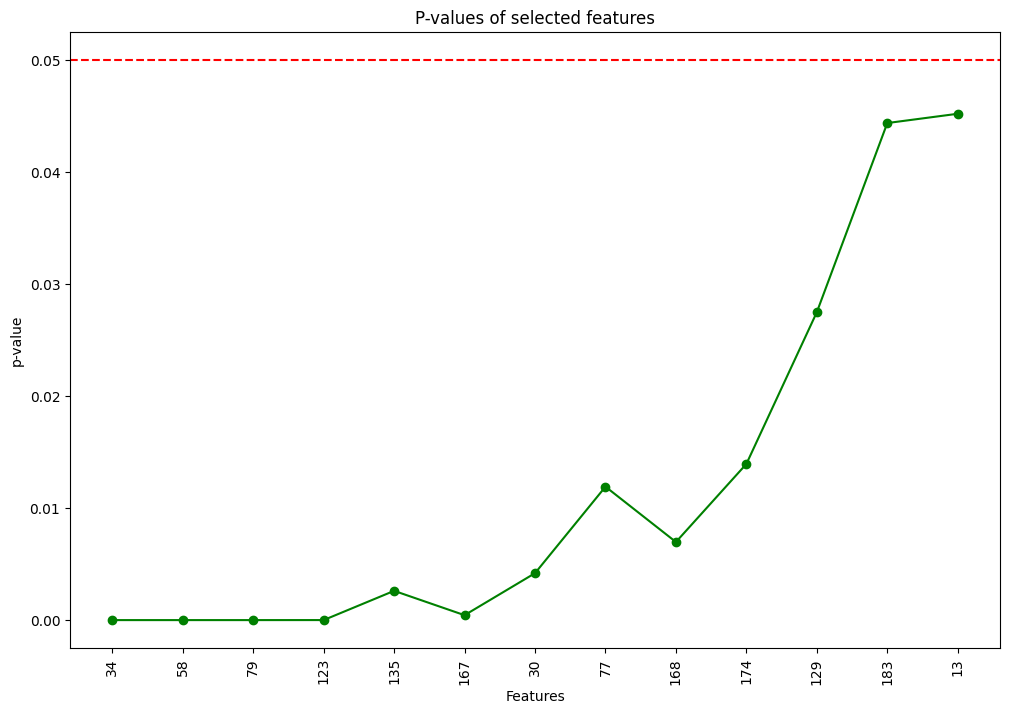

In [37]:
# Plot the p-values of the selected features
plt.figure(figsize=(12, 8))
plt.plot(p_values_selected, 'o', linestyle='-', color='green')
plt.xticks(range(len(features_selected)), features_selected, rotation=90)
plt.title("P-values of selected features")
plt.ylabel("p-value")
plt.xlabel("Features")
plt.axhline(y=0.05, color='red', linestyle='--')
plt.show()

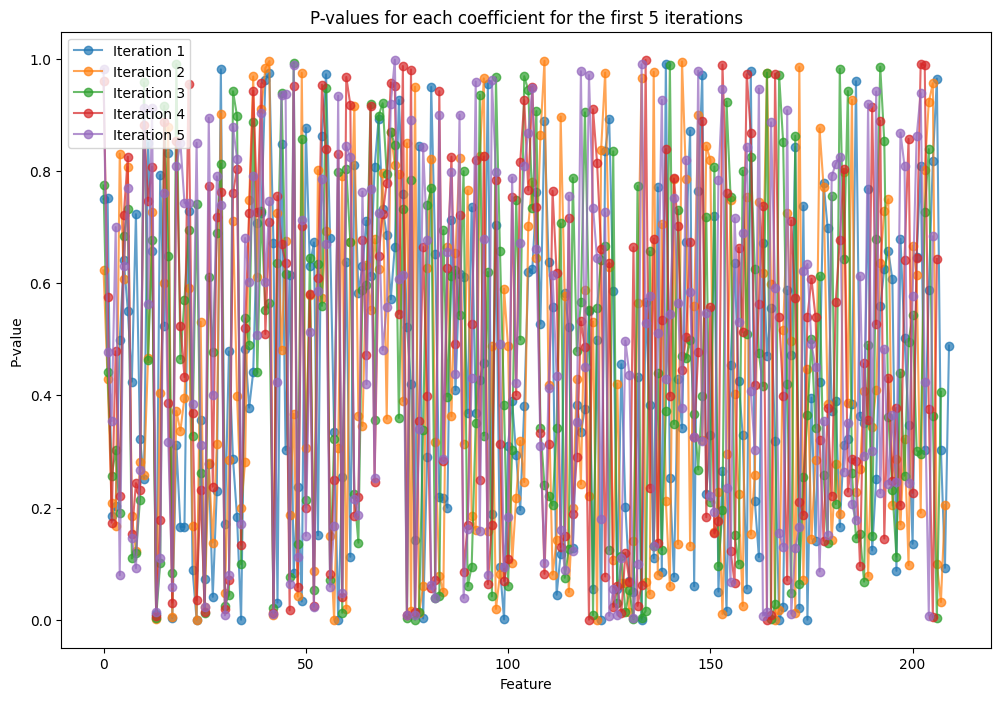

In [38]:
plt.figure(figsize=(12, 8))

for i, p_values in enumerate(iterations[:5], start=1):
    plt.plot(p_values, 'o', label=f'Iteration {i}', linestyle='-', alpha=0.7)

plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('P-values for each coefficient for the first 5 iterations')
plt.legend()
plt.show()

In the above plots, we can see:

- The p-value of the selected features
- All the p-values of the features for the first 5 iterations

In the first one we can see that the p-value of the selected features is always below 0.05, which means that the null hypothesis is rejected and the feature is relevant for predicting y.

In the second one, we have more than 200 features, so we cannot have a clear view of what is happening with the different p_values, so we cannot have a clear conclusion with this graph.


## 4

Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10^-1 and 10^6. Display two subplots at the end:

(a) The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.

(b) The second subplot should display the evolution of the R-squared coefficient at each of the 30 iterations.


#### Answer


Best alpha:  78.80462815669912
Best R-squared:  0.3251845720225325


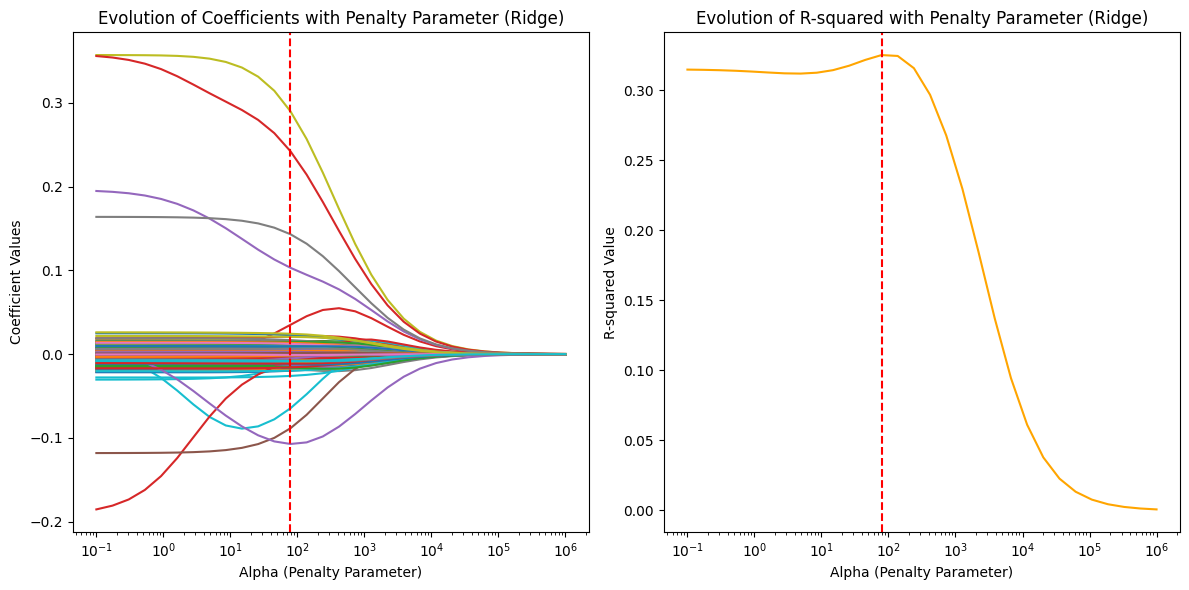

In [39]:
# Define the ridge regression model
ridge = Ridge(fit_intercept=False)

# Define the range of alpha values (penalty parameter) on a logarithmic scale
alphas = np.logspace(-1, 6, 30)

# Arrays to store coefficients and R-squared values
coefficients = []
r_squared_values = []

# Perform ridge regression for each alpha value
for alpha in alphas:
    ridge.alpha = alpha
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)
    y_pred_ridge_train = ridge.predict(X_train)
    y_pred_ridge_test = ridge.predict(X_test)
    r_squared_values.append(r2(y_test, y_pred_ridge_test))

# Convert the lists to NumPy arrays for easy indexing
coefficients = np.array(coefficients)
r_squared_values = np.array(r_squared_values)

# Get the best value of alpha
idx = np.argmax(r_squared_values)
best_alpha = alphas[idx]
best_r_squared = r_squared_values[idx]
print("Best alpha: ", best_alpha)
print("Best R-squared: ", best_r_squared)

# Train the model with the best alpha
ridge.alpha = best_alpha
ridge.fit(X_train, y_train)
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

# Plotting the coefficients evolution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('Coefficient Values')
plt.title('Evolution of Coefficients with Penalty Parameter (Ridge)')
# Plotting the best alpha
plt.axvline(x=best_alpha, color='red', linestyle='--')


# Plotting the R-squared evolution
plt.subplot(1, 2, 2)
plt.plot(alphas, r_squared_values, color='orange')
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('R-squared Value')
plt.title('Evolution of R-squared with Penalty Parameter (Ridge)')
plt.axvline(x=best_alpha, color='red', linestyle='--')


plt.tight_layout()
plt.show()

## 5

Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10^-3 and 10^2


#### Answer


Best alpha:  0.07880462815669913
Best R-squared:  0.3417500607314029


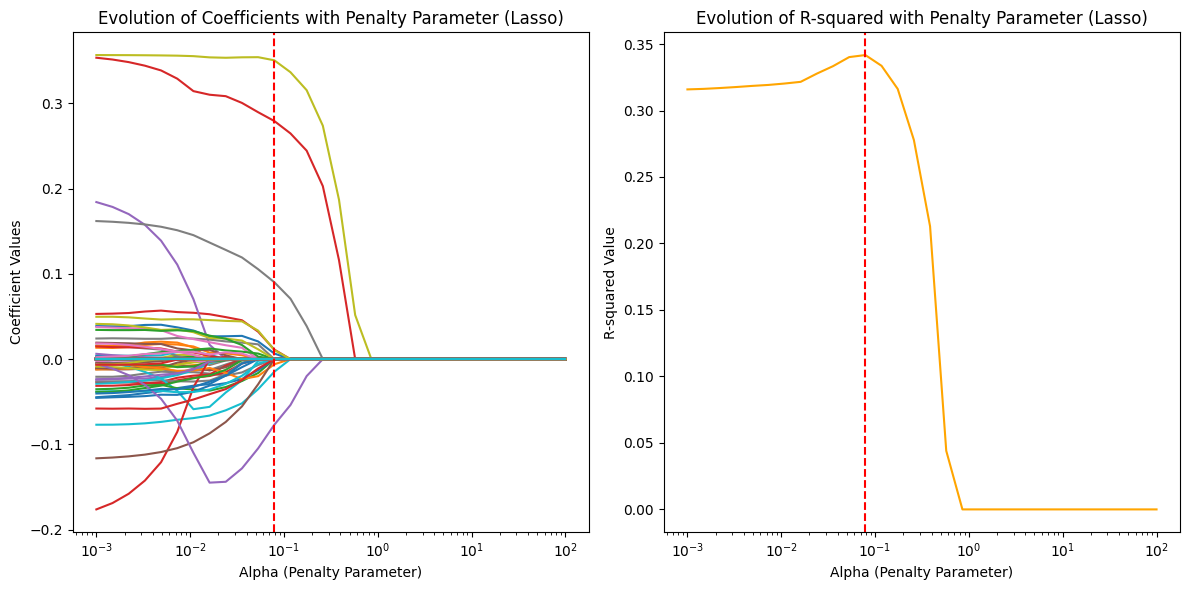

In [40]:
# Define the Lasso regression model
lasso = Lasso(fit_intercept=False)

# Define the range of alpha values (penalty parameter) on a logarithmic scale
alphas = np.logspace(-3, 2, 30)

# Arrays to store coefficients and R-squared values
coefficients = []
r_squared_values = []

# Perform Lasso regression for each alpha value
for alpha in alphas:
    lasso.alpha = alpha
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    y_pred_lasso_train = lasso.predict(X_train)
    y_pred_lasso_test = lasso.predict(X_test)
    r_squared_values.append(r2(y_test, y_pred_lasso_test))

# Convert the lists to NumPy arrays for easy indexing
coefficients = np.array(coefficients)
r_squared_values = np.array(r_squared_values)

# Get the best value of alpha
idx = np.argmax(r_squared_values)
best_alpha = alphas[idx]
best_r_squared = r_squared_values[idx]
print("Best alpha: ", best_alpha)
print("Best R-squared: ", best_r_squared)


# Train the model with the best alpha
lasso.alpha = best_alpha
lasso.fit(X_train, y_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)


# Plotting the coefficients evolution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('Coefficient Values')
plt.title('Evolution of Coefficients with Penalty Parameter (Lasso)')
# Plotting the best alpha
plt.axvline(x=best_alpha, color='red', linestyle='--')

# Plotting the R-squared evolution
plt.subplot(1, 2, 2)
plt.plot(alphas, r_squared_values, color='orange')
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('R-squared Value')
plt.title('Evolution of R-squared with Penalty Parameter (Lasso)')
plt.axvline(x=best_alpha, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## 6

Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between 10^-3 and 10^2.


#### Answer


Best alpha:  0.11721022975334805
Best R-squared:  0.34656625920915063


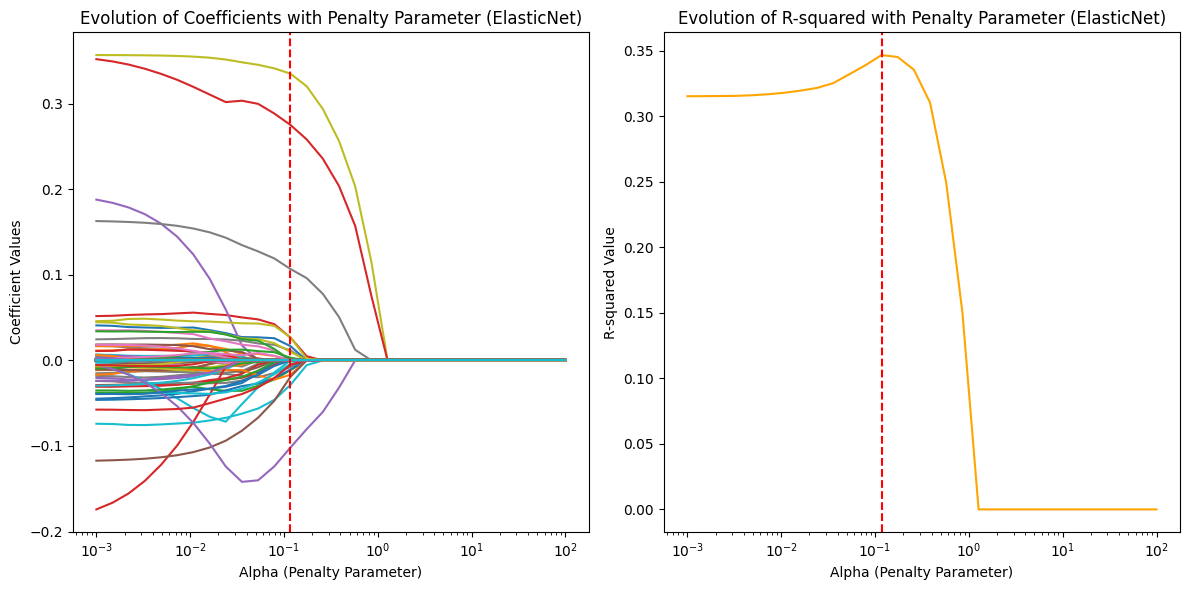

In [41]:
# Define the ElasticNet regression model
elastic_net = ElasticNet(fit_intercept=False)

# Define the range of alpha values (penalty parameter) on a logarithmic scale
alphas = np.logspace(-3, 2, 30)

# Arrays to store coefficients and R-squared values
coefficients = []
r_squared_values = []

# Perform ElasticNet regression for each alpha value
for alpha in alphas:
    elastic_net.alpha = alpha
    elastic_net.fit(X_train, y_train)
    coefficients.append(elastic_net.coef_)
    y_pred_elastic_net_train = elastic_net.predict(X_train)
    y_pred_elastic_net_test = elastic_net.predict(X_test)
    r_squared_values.append(r2(y_test, y_pred_elastic_net_test))

# Convert the lists to NumPy arrays for easy indexing
coefficients = np.array(coefficients)
r_squared_values = np.array(r_squared_values)

# Get the best value of alpha
idx = np.argmax(r_squared_values)
best_alpha = alphas[idx]
best_r_squared = r_squared_values[idx]
print("Best alpha: ", best_alpha)
print("Best R-squared: ", best_r_squared)

# Train the model with the best alpha
elastic_net.alpha = best_alpha
elastic_net.fit(X_train, y_train)
y_pred_elastic_net_train = elastic_net.predict(X_train)
y_pred_elastic_net_test = elastic_net.predict(X_test)


# Plotting the coefficients evolution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('Coefficient Values')
plt.title('Evolution of Coefficients with Penalty Parameter (ElasticNet)')
# Plotting the best alpha
plt.axvline(x=best_alpha, color='red', linestyle='--')


# Plotting the R-squared evolution
plt.subplot(1, 2, 2)
plt.plot(alphas, r_squared_values, color='orange')
plt.xscale('log')
plt.xlabel('Alpha (Penalty Parameter)')
plt.ylabel('R-squared Value')
plt.title('Evolution of R-squared with Penalty Parameter (ElasticNet)')
plt.axvline(x=best_alpha, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## 7

Compute the singular value decomposition of the covariance matrix. For consistency in the notation use U, s, V = SVD(X.T X).


### (a)

Plot a heatmap of the covariance matrix.


#### Answer

Similar to the plot of the p-values, we have more than 200 features, so we cannot have a clear view of the different values of the covariance matrix, so we cannot have a clear conclusion with this graph.


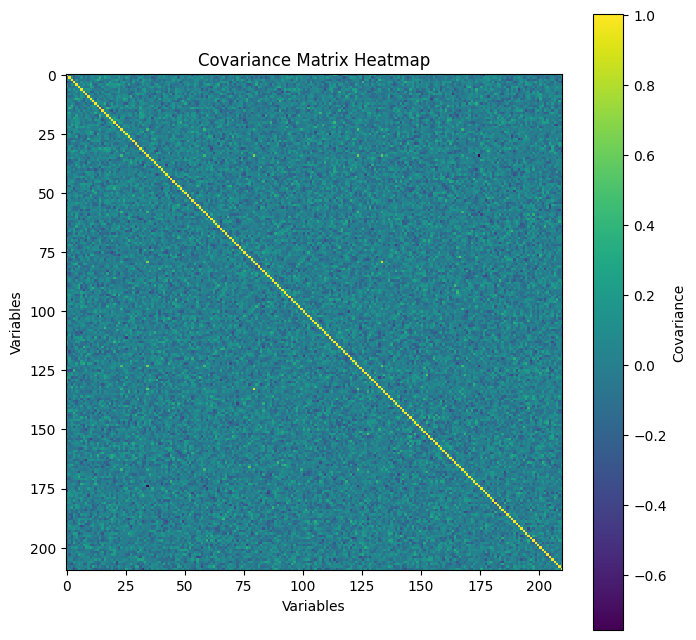

In [42]:
# Compute the covariance matrix of df
covariance_matrix = np.cov(X_train, rowvar=False)

# Plot heatmap
plt.figure(figsize=(8, 8))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### (b)

Compute the PCA for the data using the SVD.


#### Answer


In [43]:
# Compute the singular value decomposition
U, s, V = np.linalg.svd(covariance_matrix)

# Project the data onto the principal components
pca_data = PCA(n_components=len(s)).fit_transform(X_train)

In [44]:
# Compute the PCA
def calculate_pca(X, k):


    X_pca = X @ U[:, :k]


    return X_pca, s[:k]

### (c)

Plot the amount of variance explained by the first k components for k P 2..p. How many variables do we need to explain more than 90% of the variance?


#### Answer


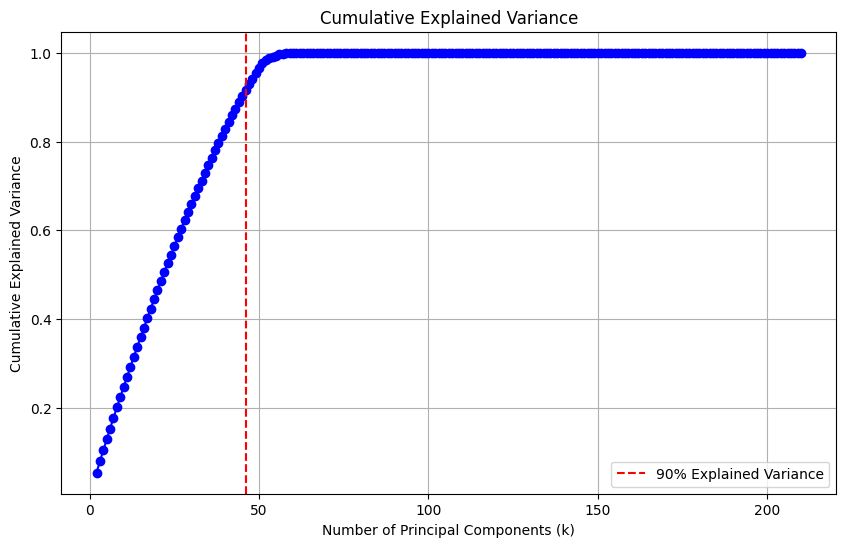

Number of variables needed to explain more than 90% of the variance: 46


In [45]:
# Calculate the explained variance ratio
explained_variance_ratio = s / np.sum(s)

# Plot the amount of variance explained by the first k components
k_values = range(2, len(explained_variance_ratio) + 1)  # Start from k=2
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(
    k_values, cumulative_explained_variance[1:], marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Highlight the point where explained variance exceeds 90%
threshold_index = np.argmax(cumulative_explained_variance > 0.9)
plt.axvline(x=k_values[threshold_index], color='r',
            linestyle='--', label='90% Explained Variance')

plt.legend()
plt.show()

# Print the number of variables needed to explain more than 90% of the variance
num_components_needed = k_values[threshold_index]
print(
    f"Number of variables needed to explain more than 90% of the variance: {num_components_needed}")

### (d)

Plot the projected data with k = 2 using as color the value of y and interpret the plot.


#### Answer


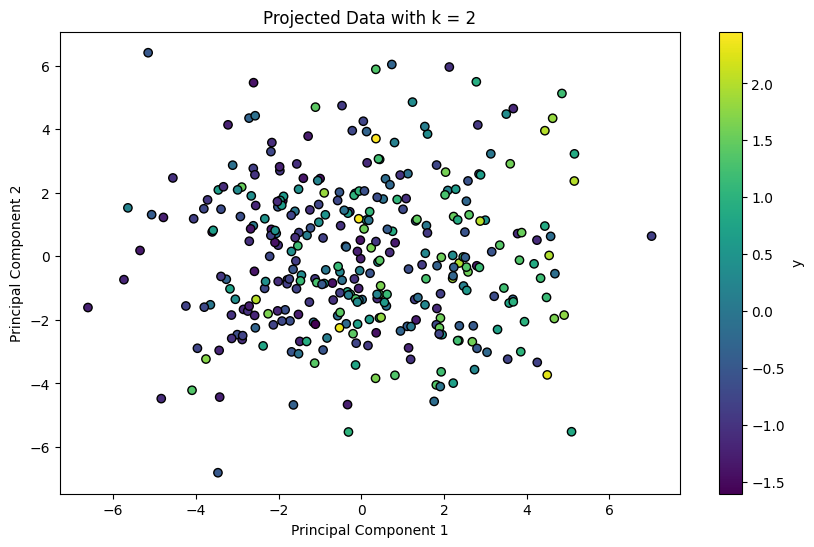

In [46]:
# Choose the number of principal components (k)
k = 2

# Project the data onto the first k principal components
projected_data = pca_data[:, :k]

projected_data = X_train @ U[:, :k]

# Plot the projected data with colors representing the values of y
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    projected_data[:, 0], projected_data[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.colorbar(scatter, label='y')
plt.title(f'Projected Data with k = {k}')
plt.xlabel(f'Principal Component 1')
plt.ylabel(f'Principal Component 2')
plt.show()

### (e)

Plot the the two first principal directions


#### Answer


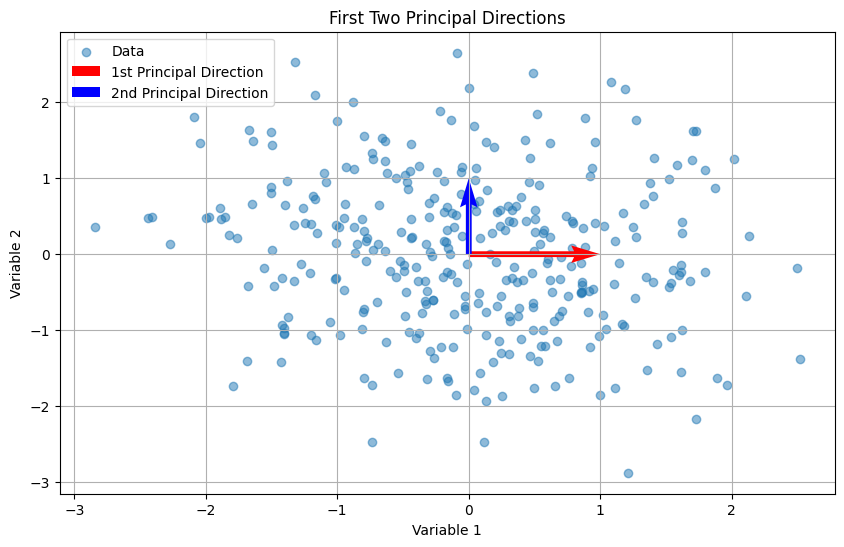

In [47]:
# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5, label='Data')

# Plot the first principal direction
plt.quiver(0, 0, V[:, 0] @ V[:, 0], V[:, 0] @ V[:, 1], angles='xy',
           scale_units='xy', scale=1, color='r', label='1st Principal Direction')

# Plot the second principal direction
plt.quiver(0, 0, V[:, 1] @ V[:, 0], V[:, 1] @ V[:, 1], angles='xy',
           scale_units='xy', scale=1, color='b', label='2nd Principal Direction')

plt.title('First Two Principal Directions')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()
plt.grid(True)
plt.show()

### (f)

Run OLS on the projected data (PCR) using k components for k < 50. Select the k that returns the best score of the OLS model and plot the evolution of the scores with k.


#### Answer


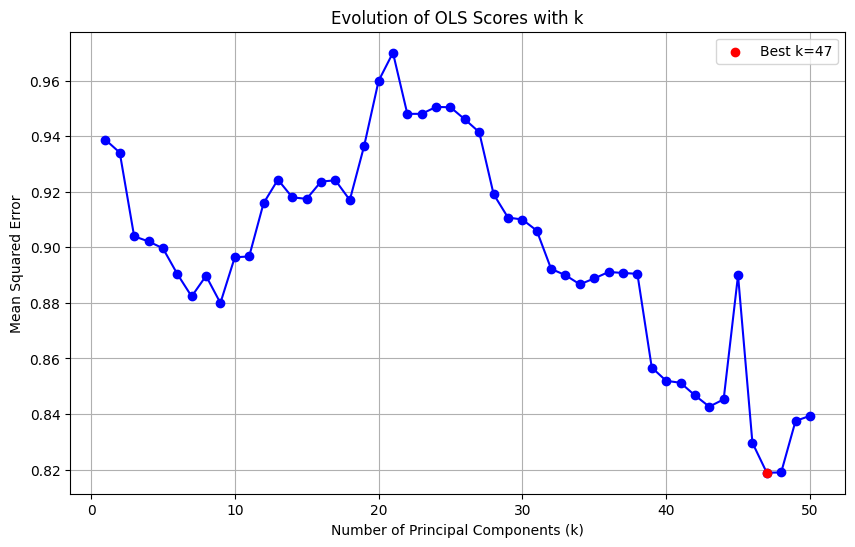

Best k that returns the lowest MSE: 47


In [48]:
# Define a range of k values
k_values = range(1, 51)

# Initialize a list to store scores
scores = []

# Perform OLS regression for each k
for k in k_values:
    # Project the data onto the first k principal components
    projected_data = X_train @ U[:, :k]

    # Split the data into training and testing sets
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        projected_data, y_train, test_size=0.25, random_state=42)

    # Fit OLS model
    model = LinearRegression()
    model.fit(X_train_pca, y_train_pca)

    # Make predictions on the test set
    y_pred = model.predict(X_test_pca)

    # Calculate and store the mean squared error
    mse_pd = mse(y_test_pca, y_pred)
    scores.append(mse_pd)

# Find the value of k that returns the best score
best_k = k_values[np.argmin(scores)]

# Fit the model with the best k
projected_data = X_train @ U[:, :best_k]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    projected_data, y_train, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)
y_pred_pca_train = model.predict(X_train_pca)
y_pred_pca_test = model.predict(X_test_pca)


# Plot the evolution of scores with k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.title('Evolution of OLS Scores with k')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Highlight the point with the best score
plt.scatter(best_k, min(scores), color='r', label=f'Best k={best_k}', zorder=5)
plt.legend()

plt.show()

print(f"Best k that returns the lowest MSE: {best_k}")

## 8

Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.


#### Answer

The variation in R² values for the test set, ranging from 0.2 to 0.35, indicates suboptimal regression performance, potentially stemming from high collinearity among the variables. Despite this, the PCA model's lower R² values compared to Ridge, Lasso, and ElasticNet models suggest additional complexities such as nonlinearity between the features and the dependent variable.

Interestingly, the training model demonstrates significant improvement with R² values ranging from 0.43 to 0.61. This suggests hypotheses like insufficient training data or implicit bias in the test data, prompting further investigation.

Examining the MSE values, training ranges from 0.4 to 0.55, while test values span from 0.51 to 0.82. These disparities hint at potential overfitting, limited training data, or inadequate generalization of the relationship between features X and the dependent variable y. Additionally, bias within the test data might contribute to these findings, warranting closer scrutiny for refined model performance.

In conclusion, although ElasticNet outperformed in tests for R² and MSE, and Ridge excelled in training tests, the reasons for such performance variations could be multifaceted. These include ElasticNet's adaptability to handle collinearity and nonlinearity in test data, while Ridge's stability in mitigating overfitting might have contributed to its superior performance in the training set. These insights underscore the importance of comprehensive model evaluation and understanding the underlying data dynamics.


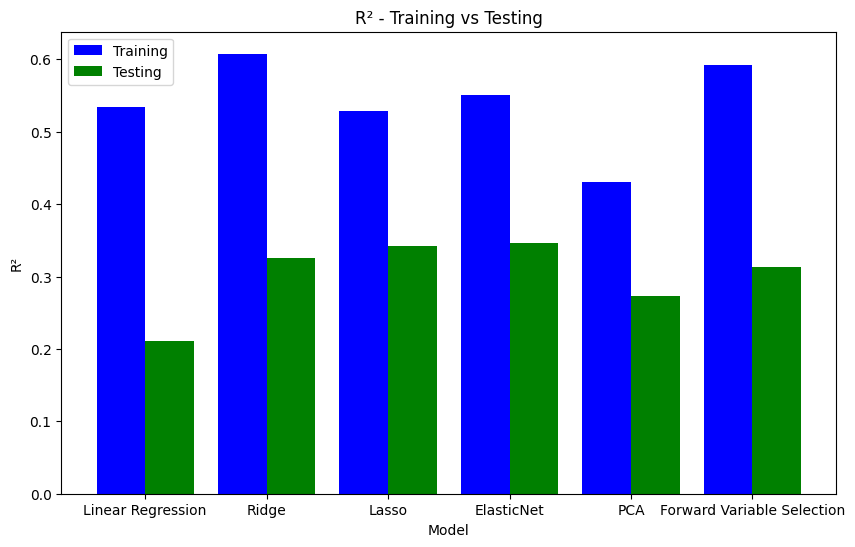

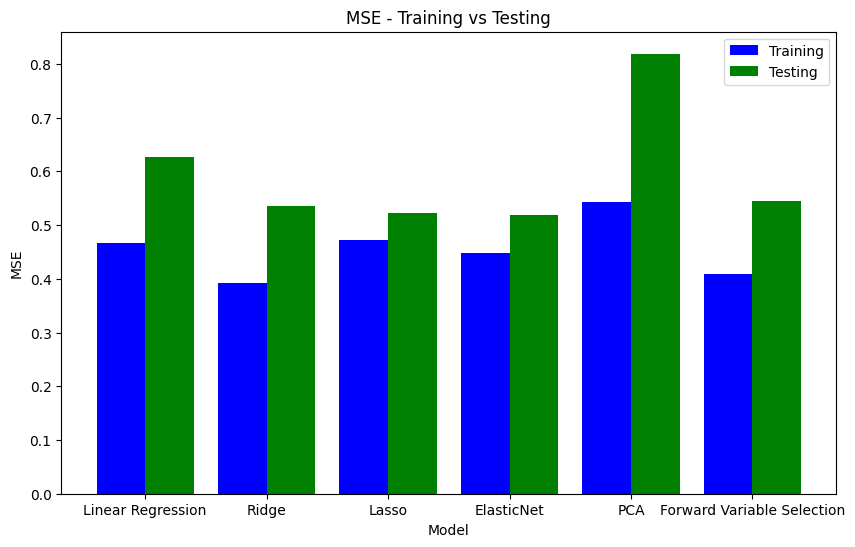

                                  R²       MSE
Linear Regression           0.211506  0.625958
Ridge                       0.325185  0.535712
Lasso                       0.341750  0.522562
ElasticNet                  0.346566  0.518738
PCA                         0.273609  0.818862
Forward Variable Selection  0.313216  0.545214
                                  R²       MSE
Linear Regression           0.533713  0.466287
Ridge                       0.607803  0.392197
Lasso                       0.528420  0.471580
ElasticNet                  0.551401  0.448599
PCA                         0.430974  0.542106
Forward Variable Selection  0.591958  0.408042


In [53]:
# Compare all the models

# Get the diferent metrics
score_lr_test = r2(y_test, y_pred_lr_test)
score_ridge_test = r2(y_test, y_pred_ridge_test)
score_lasso_test = r2(y_test, y_pred_lasso_test)
score_en_test = r2(y_test, y_pred_elastic_net_test)
score_pca_test = r2(y_test_pca, y_pred_pca_test)
score_fvs_test = r2(y_test, y_pred_fvs_test)

mse_lr_test = mse(y_test, y_pred_lr_test)
mse_ridge_test = mse(y_test, y_pred_ridge_test)
mse_lasso_test = mse(y_test, y_pred_lasso_test)
mse_en_test = mse(y_test, y_pred_elastic_net_test)
mse_pca_test = mse(y_test_pca, y_pred_pca_test)
mse_fvs_test = mse(y_test, y_pred_fvs_test)

# Train
score_lr_train = r2(y_train, y_pred_lr_train)
score_ridge_train = r2(y_train, y_pred_ridge_train)
score_lasso_train = r2(y_train, y_pred_lasso_train)
score_en_train = r2(y_train, y_pred_elastic_net_train)
score_pca_train = r2(y_train_pca, y_pred_pca_train)
score_fvs_train = r2(y_train, y_pred_fvs_train)

mse_lr_train = mse(y_train, y_pred_lr_train)
mse_ridge_train = mse(y_train, y_pred_ridge_train)
mse_lasso_train = mse(y_train, y_pred_lasso_train)
mse_en_train = mse(y_train, y_pred_elastic_net_train)
mse_pca_train = mse(y_train_pca, y_pred_pca_train)
mse_fvs_train = mse(y_train, y_pred_fvs_train)


# Create a dataframe with the metrics
df_metrics_test = pd.DataFrame({'R²': [score_lr_test, score_ridge_test, score_lasso_test, score_en_test, score_pca_test, score_fvs_test],
                                'MSE': [mse_lr_test, mse_ridge_test, mse_lasso_test, mse_en_test, mse_pca_test, mse_fvs_test]},
                               index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'PCA', 'Forward Variable Selection'])

df_metrics_train = pd.DataFrame({'R²': [score_lr_train, score_ridge_train, score_lasso_train, score_en_train, score_pca_train, score_fvs_train],
                                'MSE': [mse_lr_train, mse_ridge_train, mse_lasso_train, mse_en_train, mse_pca_train, mse_fvs_train]},
                                index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'PCA', 'Forward Variable Selection'])

plt.figure(figsize=(10, 6))
plt.bar(df_metrics_train.index,
        df_metrics_train['R²'], color='blue', width=0.4, label='Training')
plt.bar(np.arange(len(df_metrics_test.index)) + 0.4,
        df_metrics_test['R²'], color='green', width=0.4, label='Testing')
plt.title('R² - Training vs Testing')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(np.arange(len(df_metrics_test.index)) + 0.2, df_metrics_test.index)
plt.legend()
plt.show()


# Plot the MSE of train and test in a single graph
plt.figure(figsize=(10, 6))
plt.bar(df_metrics_train.index,
        df_metrics_train['MSE'], color='blue', width=0.4, label='Training')
plt.bar(np.arange(len(df_metrics_test.index)) + 0.4,
        df_metrics_test['MSE'], color='green', width=0.4, label='Testing')
plt.title('MSE - Training vs Testing')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(np.arange(len(df_metrics_test.index)) + 0.2, df_metrics_test.index)
plt.legend()
plt.show()

In [60]:
# Print the metrics in a table 
print("Summary of Metrics for Test Data:")
display(df_metrics_test.describe())

print("Metrics for Test Data:")
display(df_metrics_test)

print("Summary of Metrics for Training Data:")
display(df_metrics_train.describe())

print("Metrics for Training Data:")
display(df_metrics_train)



Summary of Metrics for Test Data:


,R²,MSE
count,6.000000,6.000000
mean,0.301972,0.594508
std,0.051429,0.116729
min,0.211506,0.518738
25%,0.283510,0.525849
50%,0.319200,0.540463
75%,0.337609,0.605772
max,0.346566,0.818862


Metrics for Test Data:


,R²,MSE
Linear Regression,0.211506,0.625958
Ridge,0.325185,0.535712
Lasso,0.341750,0.522562
ElasticNet,0.346566,0.518738
PCA,0.273609,0.818862
Forward Variable Selection,0.313216,0.545214


Summary of Metrics for Training Data:


,R²,MSE
count,6.000000,6.000000
mean,0.540712,0.454802
std,0.062425,0.053254
min,0.430974,0.392197
25%,0.529744,0.418181
50%,0.542557,0.457443
75%,0.581819,0.470256
max,0.607803,0.542106


Metrics for Training Data:


,R²,MSE
Linear Regression,0.533713,0.466287
Ridge,0.607803,0.392197
Lasso,0.528420,0.471580
ElasticNet,0.551401,0.448599
PCA,0.430974,0.542106
Forward Variable Selection,0.591958,0.408042
